In [ ]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

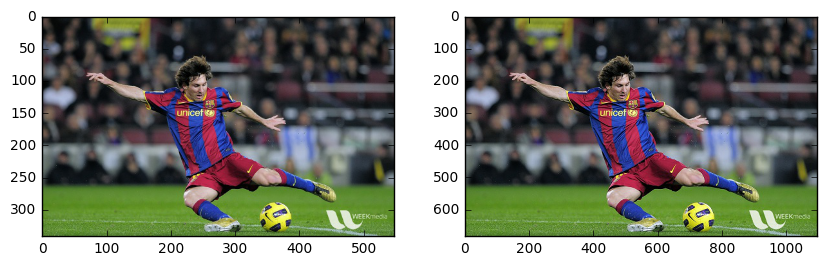

In [ ]:
# Scaling
img = cv2.imread('images/messi.jpg')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

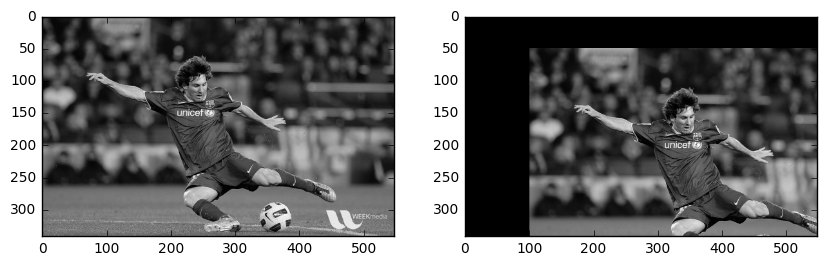

In [ ]:
# Translation
img = cv2.imread('images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

[[  6.12323400e-17   1.00000000e+00   1.03000000e+02]
 [ -1.00000000e+00   6.12323400e-17   4.45000000e+02]]


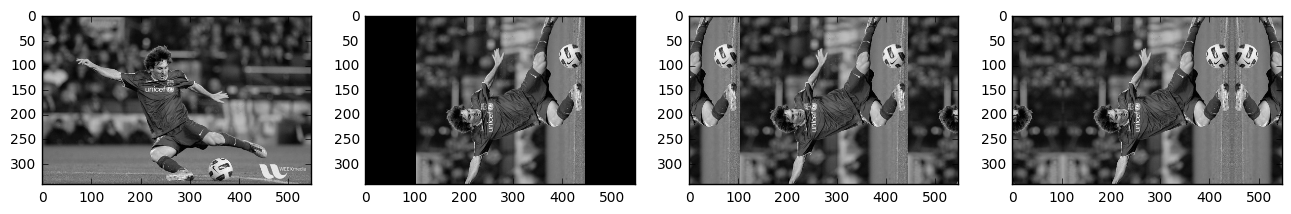

In [ ]:
# Rotation
img = cv2.imread('images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print M
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


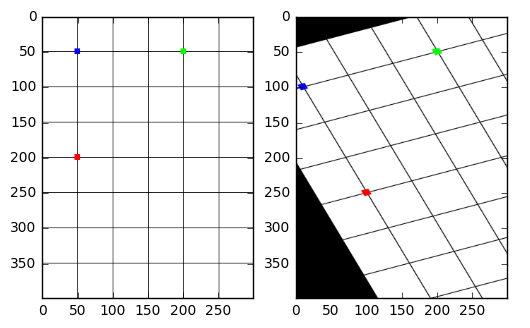

In [ ]:
# Affine Transformation
img = cv2.imread('images/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
print M

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

[[  6.87722951e-02  -1.24273581e+00   6.71000000e+02]
 [  8.66486286e-02   4.83370157e-02   3.14000000e+02]
 [ -7.63013127e-04  -3.68781623e-04   1.00000000e+00]]


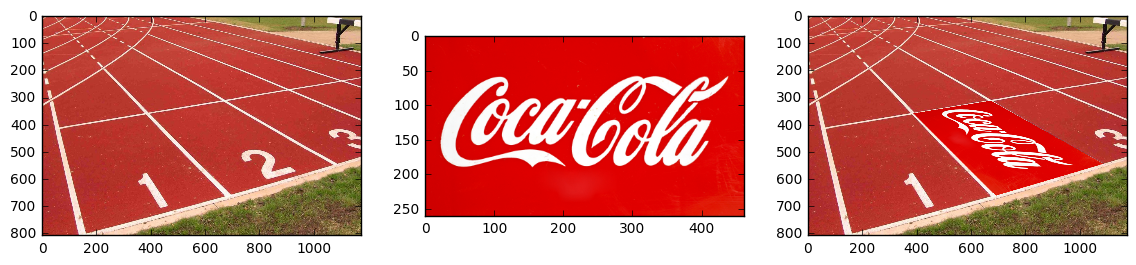

In [ ]:
# Homography(Perspective Transformation)
img1 = cv2.imread('images/track.jpg')
img2 = cv2.imread('images/logo.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

pts1 = np.float32([(0,0),(cols2-1,0),(cols2-1,rows2-1),(0,rows2-1)])
pts2 = np.float32([(671,314),(1084,546),(689,663),(386,361)])

M = cv2.getPerspectiveTransform(pts1,pts2)
print M
img3 = np.copy(img1)
cv2.warpPerspective(img2,M,(cols1,rows1),img3,borderMode=cv2.BORDER_TRANSPARENT)

plt.figure(figsize=(14,3))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))